In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры области
x0, x1 = 0, np.pi
y0, y1 = -1, 1

# Правая часть уравнения и точное решение
def f_source(x, y):
    return 4 - 29 * np.sin(2 * x + 5 * y)

def exact_solution(x, y):
    return np.sin(2 * x + 5 * y) + 2 * y**2


In [17]:
def solve_poisson(nx, ny, max_iter=200000, tol=1e-10):
    x = np.linspace(0, np.pi, nx)
    y = np.linspace(-1, 1, ny)
    hx = x[1] - x[0]
    hy = y[1] - y[0]
    X, Y = np.meshgrid(x, y, indexing='ij')

    u = np.zeros((nx, ny))
    
    # Граничные условия Дирихле по y
    u[:, 0]  = 2 + np.sin(2 * x - 5)
    u[:, -1] = 2 + np.sin(2 * x + 5)
    
    hx2 = hx * hx
    hy2 = hy * hy
    denominator = 2.0 / hx2 + 2.0 / hy2

    for iteration in range(max_iter):
        u_old = u.copy()
        
        # Основной итерационный шаг
        u[1:-1, 1:-1] = (
            (u_old[:-2, 1:-1] + u_old[2:, 1:-1]) / hx2 +
            (u_old[1:-1, :-2] + u_old[1:-1, 2:]) / hy2 -
            f_source(X[1:-1, 1:-1], Y[1:-1, 1:-1])
        ) / denominator
        
        # Периодические граничные условия по x
        u[0, :]  = u[-2, :]
        u[-1, :] = u[1, :]

        max_diff = np.max(np.abs(u - u_old))
        if max_diff < tol:
            print(f"✅ Сошлось за {iteration+1} итераций, max_diff = {max_diff:.2e}")
            break
    else:
        print(f"⚠️ Не сошлось за {max_iter} итераций, max_diff = {max_diff:.2e}")
    
    return X, Y, u


In [15]:
def calculate_error(X, Y, u_numeric):
    u_exact = exact_solution(X, Y)
    error = np.abs(u_numeric - u_exact)
    return u_exact, error

def plot_results(X, Y, u_numeric, u_exact, error):
    fig = plt.figure(figsize=(15, 5))
    
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X, Y, u_numeric, cmap='viridis')
    ax1.set_title("Численное решение")
    ax1.set_xlabel("x"); ax1.set_ylabel("y")
    
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X, Y, u_exact, cmap='viridis')
    ax2.set_title("Точное решение")
    ax2.set_xlabel("x"); ax2.set_ylabel("y")
    
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(X, Y, error, cmap='hot')
    ax3.set_title("Погрешность")
    ax3.set_xlabel("x"); ax3.set_ylabel("y")
    
    plt.tight_layout()
    plt.show()

def check_convergence_order():
    n_list = [10, 20, 40, 80]
    errors = []
    
    for n in n_list:
        print(f"\nРешаем при n = {n}")
        X, Y, u_num = solve_poisson(n, n)
        u_exact, err = calculate_error(X, Y, u_num)
        max_err = np.max(err)
        errors.append(max_err)
        print(f"Максимальная ошибка: {max_err:.2e}")
    
    print("\nАнализ порядка аппроксимации:")
    for i in range(1, len(errors)):
        p = np.log(errors[i-1] / errors[i]) / np.log(n_list[i] / n_list[i-1])
        print(f"Порядок между n={n_list[i-1]} и n={n_list[i]}: p ≈ {p:.3f}")


Решение уравнения Пуассона методом простой итерации...
✅ Сошлось за 15259 итераций, max_diff = 1.00e-10


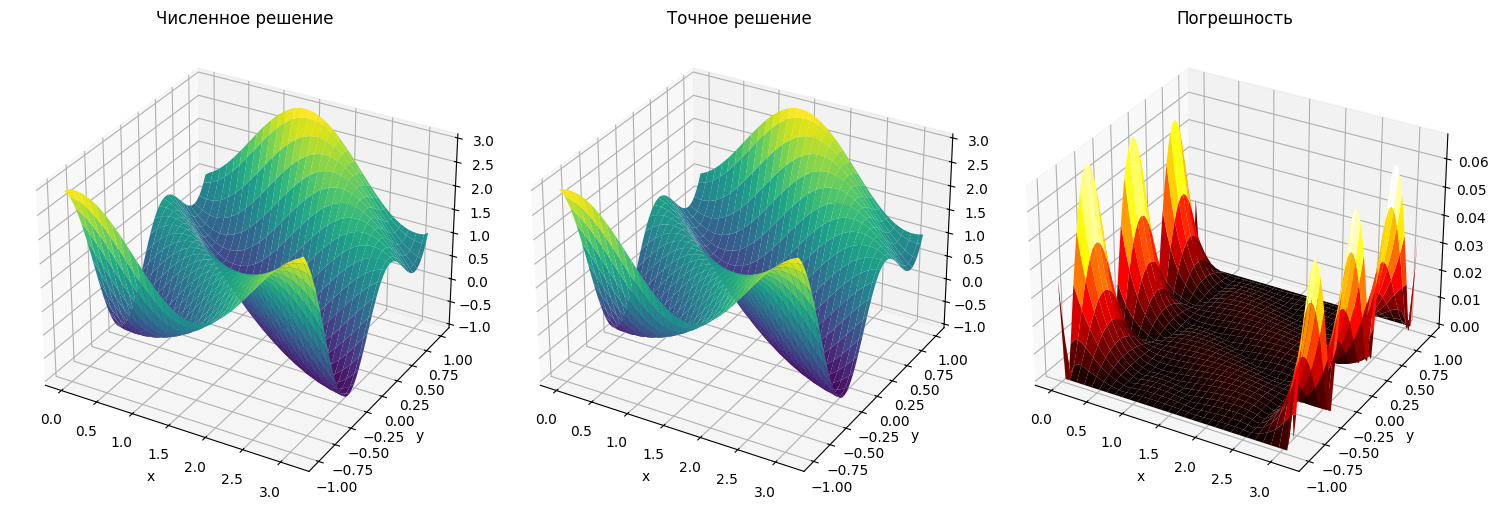


Решаем при n = 10
✅ Сошлось за 436 итераций, max_diff = 9.98e-11
Максимальная ошибка: 6.26e-01

Решаем при n = 20
✅ Сошлось за 1811 итераций, max_diff = 9.94e-11
Максимальная ошибка: 2.46e-01

Решаем при n = 40
✅ Сошлось за 7023 итераций, max_diff = 1.00e-10
Максимальная ошибка: 1.06e-01

Решаем при n = 80
✅ Сошлось за 26324 итераций, max_diff = 1.00e-10
Максимальная ошибка: 4.91e-02

Анализ порядка аппроксимации:
Порядок между n=10 и n=20: p ≈ 1.348
Порядок между n=20 и n=40: p ≈ 1.219
Порядок между n=40 и n=80: p ≈ 1.107


In [18]:
def main():
    print("Решение уравнения Пуассона методом простой итерации...")
    X, Y, u_num = solve_poisson(60, 60)
    u_exact, error = calculate_error(X, Y, u_num)
    
    plot_results(X, Y, u_num, u_exact, error)
    check_convergence_order()

if __name__ == "__main__":
    main()
